In [1]:
# Importing necessary packages.
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
# Reading the data.
df = pd.read_csv (r'/Users/Colin/Desktop/Research project/Sigma/Data - Final/Final Data.csv')
df['datadate'] = pd.to_datetime(df.datadate, format='%d/%m/%Y')
df.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,...,txpq,uaptq,chechy,cogsy,dpy,niy,revty,xopry,xsgay,costat
0,1000,1970-03-31,1970,1.0,INDL,C,D,STD,AE.2,000032102,...,NaN,NaN,NaN,NaN,NaN,0.605,9.478,NaN,NaN,I
1,1000,1970-06-30,1970,2.0,INDL,C,D,STD,AE.2,000032102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
2,1000,1970-09-30,1970,3.0,INDL,C,D,STD,AE.2,000032102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
3,1000,1970-12-31,1970,4.0,INDL,C,D,STD,AE.2,000032102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
4,1000,1971-03-31,1971,1.0,INDL,C,D,STD,AE.2,000032102,...,NaN,NaN,NaN,NaN,NaN,0.346,7.983,NaN,NaN,I


In [3]:
# Creating data wrangling functions.

# Function to fill in missing values in a forward manner.
def fillForwardDataframe(df, id, columns_list):
    # type(df) = pandas DataFrame
    # type(id) = str
    # type(columns_list) = list
    df_ffill = df.copy()
    for column in columns_list:
        df_ffill[column] = (df_ffill.groupby(id)[column].ffill())
    return df_ffill

# Function to fill in missing values by taking median of cross-section.
def fillMedianDataframe(df, date, columns_list):
    # type(df) = pandas DataFrame
    # type(date) = str
    # type(columns_list) = list
    df_fill_median = df.copy()
    for column in columns_list:
        df_fill_median[column] = df_fill_median[column].fillna(df_fill_median.groupby(date)[column].transform('median'))
    return df_fill_median

# Function to add lags in the dataframe.
def createLaggedDataframe(df, id, lags_list, columns_list):
    # type(df) = pandas DataFrame
    # type(id) = str
    # type (lags_list) = list
    # type(columns_list) = list
    df_lagged = df.copy()
    for lag in lags_list:
        for column in columns_list:
            new_col_name = column + str('_l') + str(lag) #FIXME: adapt so that shifts with pos int have neg int in name and vice versa
            df_lagged[new_col_name] = (df_lagged.groupby(id)[column].shift(lag))
    return df_lagged

In [4]:
# Creating simple dataset to perform quality check of data wrangling functions.
data = {'datacqtr':['1983Q3', '1983Q4', '1983Q3', '1983Q3', '1983Q4', '1984Q1', '1984Q1'],
        'cusip': ['AAPL', 'AAPL', 'TSLA', 'GOOG', 'GOOG', 'MFST', 'AMZN'],
        'stock_price':[1, None, 3, None, 100, None, None]}
df_example = pd.DataFrame(data)
display(df_example)

,datacqtr,cusip,stock_price
0,1983Q3,AAPL,1.0
1,1983Q4,AAPL,NaN
2,1983Q3,TSLA,3.0
3,1983Q3,GOOG,NaN
4,1983Q4,GOOG,100.0
5,1984Q1,MFST,NaN
6,1984Q1,AMZN,NaN


In [5]:
# Using function to fill in the missing values in the dataframe. We do this only in a forward manner.
id = 'cusip'
columns_list = ['stock_price']
df_ffill = fillForwardDataframe(df_example, id, columns_list)
print("After forward fill:")
display(df_ffill)

# Using function to fill in the missing values in the dataframe. We do this by taking median of cross-section.
date = 'datacqtr'
df_fill_median = fillMedianDataframe(df_ffill, date, columns_list)
print("After median fill:")
display(df_fill_median)

# Using function to add lags (5 backward and 1 forward) in the dataframe.
lags_list = [5,4,3,2,1,-1]
df_lagged = createLaggedDataframe(df_fill_median, id, lags_list, columns_list)
print("After lags:")
display(df_lagged)

After forward fill:


,datacqtr,cusip,stock_price
0,1983Q3,AAPL,1.0
1,1983Q4,AAPL,1.0
2,1983Q3,TSLA,3.0
3,1983Q3,GOOG,NaN
4,1983Q4,GOOG,100.0
5,1984Q1,MFST,NaN
6,1984Q1,AMZN,NaN


After median fill:


,datacqtr,cusip,stock_price
0,1983Q3,AAPL,1.0
1,1983Q4,AAPL,1.0
2,1983Q3,TSLA,3.0
3,1983Q3,GOOG,2.0
4,1983Q4,GOOG,100.0
5,1984Q1,MFST,NaN
6,1984Q1,AMZN,NaN


After lags:


,datacqtr,cusip,stock_price,stock_price_l5,stock_price_l4,stock_price_l3,stock_price_l2,stock_price_l1,stock_price_l-1
0,1983Q3,AAPL,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1983Q4,AAPL,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,1983Q3,TSLA,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1983Q3,GOOG,2.0,NaN,NaN,NaN,NaN,NaN,100.0
4,1983Q4,GOOG,100.0,NaN,NaN,NaN,NaN,2.0,NaN
5,1984Q1,MFST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1984Q1,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# filter_col = [col for col in df_lagged if col.starddtswith('revty')]

In [7]:
feature_cols = df.columns.tolist()
feature_cols.remove('costat')
feature_cols = feature_cols[-17:]
print(feature_cols)

['acoq', 'aoq', 'dlcq', 'invtq', 'lcoq', 'ltq', 'ppegtq', 'rectq', 'txpq', 'uaptq', 'chechy', 'cogsy', 'dpy', 'niy', 'revty', 'xopry', 'xsgay']


In [8]:
# Using function to fill in the missing values in the dataframe. We do this only in a forward manner.
id = 'cusip'
columns_list = feature_cols
df_ffill = fillForwardDataframe(df, id, columns_list)

# Using function to fill in the missing values in the dataframe. We do this by taking median of cross-section.
date = 'datacqtr'
df_fill_median = fillMedianDataframe(df_ffill, date, columns_list)

# Using function to add lags (5 backward and 1 forward) in the dataframe.
lags_list = [5,4,3,2,1,-1]
df_lagged = createLaggedDataframe(df_fill_median, id, lags_list, columns_list)

In [9]:
# Dropping rows with NaN and comparing cleaned-up dataframe with original.
df_lagged = df_lagged.dropna()
print("Number of rows in new dataframe: " + str(df_lagged.shape[0]) + ".")
print("Number of rows in originial dataframe: " + str(df.shape[0]) + ".")
print("Ratio of above two numbers: " + str(df_lagged.shape[0]/df.shape[0]) + ".")

Number of rows in new dataframe: 516499.
Number of rows in originial dataframe: 627386.
Ratio of above two numbers: 0.8232555396518252.


In [10]:
#FIXME: scaling!

In [11]:
# Splitting dataframe into train (+val) and test sets.
from datetime import datetime
df_train_val = df_lagged[(df_lagged.datadate >= datetime(1970, 1, 1)) & (df_lagged.datadate <= datetime(1999, 12, 31))]
df_test = df_lagged[(df_lagged.datadate >= datetime(2000, 1, 1)) & (df_lagged.datadate <= datetime(2016, 12, 31))]

In [12]:
# Defining and using functions to generate lists with all column names for X and y dataframes.
def createColsX(feature_cols, lags_list):
    list_cols_X  = feature_cols.copy()
    for lag in lags_list:
        for column in feature_cols:
            new_col_name = column + str('_l') + str(lag) #FIXME: adapt so that shifts with pos int have neg int in name and vice versa
            list_cols_X.append(new_col_name)
    return list_cols_X

def createColsy(feature_cols, lags_list):
    list_cols_X  = []
    for lag in lags_list:
        for column in feature_cols:
            new_col_name = column + str('_l') + str(lag) #FIXME: adapt so that shifts with pos int have neg int in name and vice versa
            list_cols_X.append(new_col_name)
    return list_cols_X

list_cols_X = createColsX(feature_cols, lags_list=[5,4,3,2,1])
list_cols_y = createColsy(feature_cols, lags_list=[-1])

In [13]:
# Splitting dataframes into X and y dataframes.
X_train_val = df_train_val.filter(list_cols_X)
y_train_val = df_train_val.filter(list_cols_y)         #FIXME: might have to inverse the sign if I change the above function.
X_test = df_test.filter(list_cols_X)
y_test = df_test.filter(list_cols_y) 

In [14]:
# Splitting train (+val) dataframe into training and validation sets.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.7, random_state=42) #FIXME: not 30% of rows, but 30% of stocks!

In [15]:
X_train.shape[1]

102

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ModelCheckpoint

# define the keras model
model = Sequential()
model.add(Dense(1024, input_dim=102, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['accuracy'])

Using TensorFlow backend.
2021-12-26 12:35:31.171814: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-26 12:35:31.172082: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [17]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=4000, verbose=0, callbacks=[es, mc], batch_size=250)


Epoch 00001: val_accuracy improved from -inf to 0.00359, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.00359 to 0.01859, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.01859

Epoch 00004: val_accuracy improved from 0.01859 to 0.05976, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.05976 to 0.06772, saving model to best_model.h5

Epoch 00006: val_accuracy did not improve from 0.06772

Epoch 00007: val_accuracy improved from 0.06772 to 0.10322, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.10322

Epoch 00009: val_accuracy did not improve from 0.10322

Epoch 00010: val_accuracy did not improve from 0.10322

Epoch 00011: val_accuracy did not improve from 0.10322

Epoch 00012: val_accuracy did not improve from 0.10322

Epoch 00013: val_accuracy did not improve from 0.10322

Epoch 00014: val_accuracy did not improve from 0.10322

Epoch 00015: val_accuracy did not improve f

In [20]:
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.102, Test: 0.006


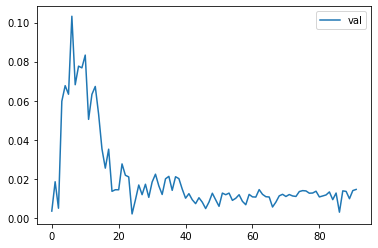

In [26]:
from matplotlib import pyplot

# plot training history
#pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#FIXME: to-do => read paper with more detailed attention and learn (a lot) more about Keras.